In [37]:

import os
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import *
import matplotlib.pyplot as plt

In [38]:

os.getcwd()

'/Users/habbasi/Documents/Broad/Broad_collaborative_projects /Assay_Dev_projects/Tissue_projects/2016_10_19_InSitu_Expression_Hacohen_Lab_Paul_Hoover_Partners/Scripts'

## loading of data

In [39]:
data = pd.read_csv('../data/ExpPHa04_4_CD300E-NOTCH3-CSF1R-PDGFRB.tif_1501_job2985.object_results_CLEANED.csv')
data.head()


,Image Location,Analysis Region,Analysis Inputs,Object Id,XMin,XMax,YMin,YMax,Opal 520 Copies,Opal 520 Area (µm²),...,Opal 690 Copies,Opal 690 Area (µm²),Opal 690 Classification,Opal 690 Cell Intensity,Opal 690 Avg Intensity,Cell Area (µm²),Cytoplasm Area (µm²),Nucleus Area (µm²),Nucleus Perimeter (µm),Nucleus Roundness
0,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,10,7239,7261,418,433,9,4.919379,...,117,25.334800,4,43.079090,1.700392,65.67371,46.24216,19.43155,18.84620,0.843177
1,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,112,7012,7035,624,646,7,3.197596,...,70,25.334800,4,25.940230,1.023897,92.23836,64.68983,27.54852,22.81382,0.793136
2,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,131,6945,6965,656,675,2,0.737907,...,90,23.121080,4,33.045590,1.429241,59.77045,43.04456,16.72589,16.36643,0.725469
3,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,251,7234,7253,815,836,8,4.673410,...,26,13.774260,4,9.252905,0.671753,72.56084,43.29053,29.27030,22.81382,0.736006
4,\\172.20.47.181\data\CTC_Lab\Polaris\2020-01(J...,outline,Class List:;Classifier:;Classifier Output Type...,269,6583,6610,828,854,1,0.245969,...,1,0.491938,1,0.210680,0.428265,114.37560,58.29464,56.08092,32.23692,0.795500


### Renaming of Column names

In [40]:

data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns


Index(['Image_Location', 'Analysis_Region', 'Analysis_Inputs', 'Object_Id',
       'XMin', 'XMax', 'YMin', 'YMax', 'Opal_520_Copies',
       'Opal_520_Area_(µm²)', 'Opal_520_Classification',
       'Opal_520_Cell_Intensity', 'Opal_520_Avg_Intensity', 'Opal_570_Copies',
       'Opal_570_Area_(µm²)', 'Opal_570_Classification',
       'Opal_570_Cell_Intensity', 'Opal_570_Avg_Intensity', 'Opal_620_Copies',
       'Opal_620_Area_(µm²)', 'Opal_620_Classification',
       'Opal_620_Cell_Intensity', 'Opal_620_Avg_Intensity', 'Opal_690_Copies',
       'Opal_690_Area_(µm²)', 'Opal_690_Classification',
       'Opal_690_Cell_Intensity', 'Opal_690_Avg_Intensity', 'Cell_Area_(µm²)',
       'Cytoplasm_Area_(µm²)', 'Nucleus_Area_(µm²)', 'Nucleus_Perimeter_(µm)',
       'Nucleus_Roundness'],
      dtype='object')

## Function to Calculate Centroids of the rectangular bounding boxes

### Note:
### 1st step: calculating center of detected objects by calculating center of bounding boxes

In [41]:
# Use the height and width to calculate the area
def X_centroid(row):
    X = int(row['XMin'] + row['XMax'])/2

    return int(X)

def Y_centroid(row):
    Y = int(row['YMin'] + row['YMax'])/2
    return int(Y)

data['X'] = data.apply(X_centroid, axis=1)
data['Y'] = data.apply(Y_centroid, axis=1)


### Plotting of coordinates

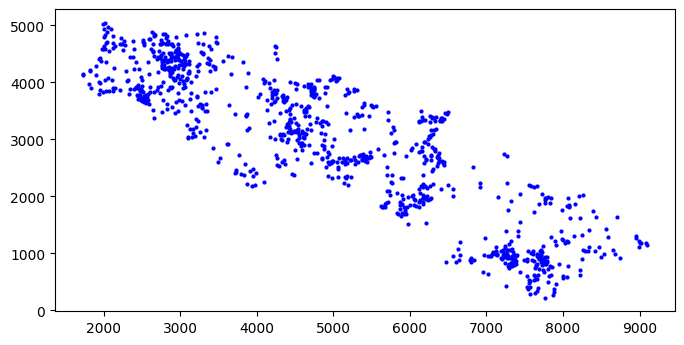

In [42]:
x = np.array(data.X)
y = np.array(data.Y)


w=8
h=4
d=100
plt.figure(figsize=(w, h), dpi=d)
plt.plot(x, y, 'bo', markersize=2)

plt.savefig("../Figures/tissue.png")



### Calculating distances

In [43]:
def classification(row):
    
    if (row['Opal_620_Classification'] == 0) & (row['Opal_690_Classification'] < 2):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 0) & (row['Opal_690_Classification'] > 1):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 1) & (row['Opal_690_Classification'] <= 2):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 1) & (row['Opal_690_Classification'] > 2):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 0):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 0):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 1):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 2):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 3):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 4):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] > 1):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 4) & (row['Opal_690_Classification'] < 3):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 4) & (row['Opal_690_Classification'] > 2):
        return 'MIXED'
    else:
        return 'NA'
    
    

In [44]:


data['Classification'] = data.apply(classification, axis=1)

data.head()

data.shape


(989, 36)

### Plotting

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/cell_classification.png



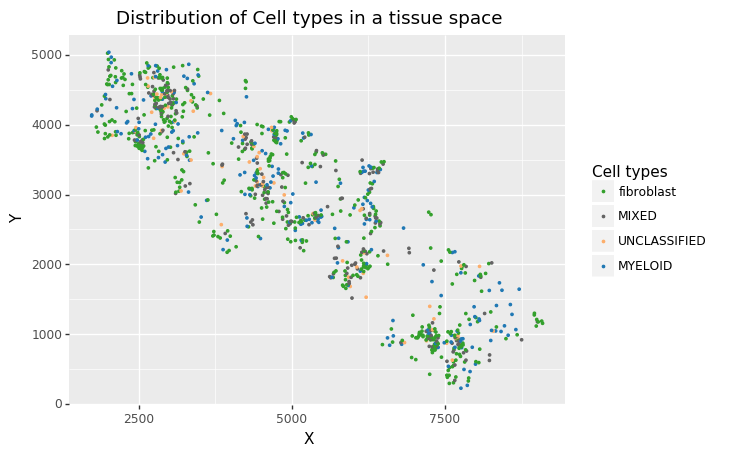

<ggplot: (359651636)>

In [45]:
p = gg.ggplot(data, gg.aes(x='X', y='Y', color= 'Classification')) + \
    gg.geom_point(size = 0.5) + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.scale_colour_manual(name= "Cell types", 
                           labels=['FIBROBLAST', 'MIXED', 'UNCLASSIFIED', 'MYELOID'], 
                           values = ["#33a02c", "#636363", "#fdae6b", "#1f78b4"])
   


    

ggsave(filename='cell_classification.png', plot = p, 
       path = '../Figures/')
p 



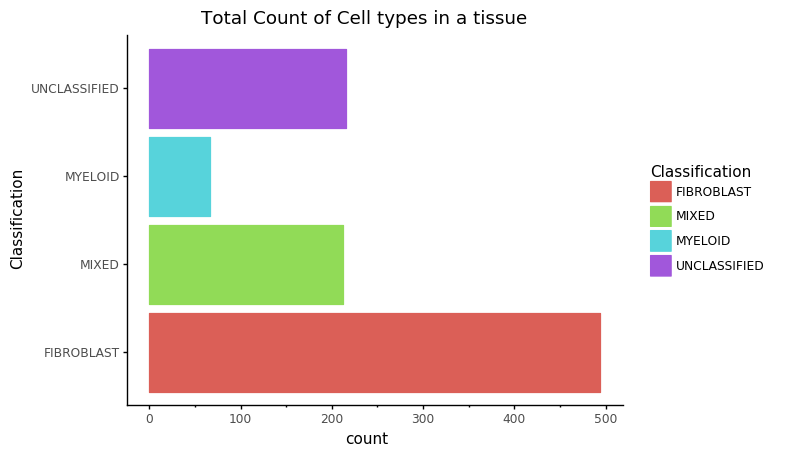

<ggplot: (355841015)>

In [46]:
p = (
    ggplot(data)
    + geom_bar(aes(x='Classification', fill = 'Classification',  color= 'Classification'))
    + coord_flip()
    + theme_classic() +
    gg.ggtitle("Total Count of Cell types in a tissue "))
# ggsave(filename='Total_Count_Celltypes.png', plot = p, 
#        path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')
p

In [47]:
pip install psutil

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import plotly
import plotly.graph_objs as go
from plotly import tools
import psutil

colors = ['#d7191c','#a6d96a', '#6a51a3', '#41b6c4']
labels = data['Classification'].unique()
values = data['Classification'].value_counts(dropna=False)

g = go.Pie(labels=labels, values=values, marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, 1], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Count of Cell types', textinfo='label+percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Frequency distribution of Cells')
fig = go.Figure(data = g, layout = layout)

fig
#py.iplot(fig, filename='pie_chart')



## Calculating Distances between cells

In [13]:
import math

combinations = []
for i in data['Classification']:
    for j in data['Classification']:
        comb = [i, j]
        combinations.append(comb)


X = list(data.X)       
Y = list(data.Y)

distance = []  
for i in range(0, len(X)):
    for j in range(0, len(X)):
        dist = math.sqrt((X[j] - X[i])**2 + ((Y[j] - Y[i])**2)) * 0.495952562137432
        distance.append(dist)

       
coordinates = []        
for i in zip(data.X, data.Y):
    for j in zip(data.X, data.Y):
        cor = [i, j]
        coordinates.append(cor)
        
obj = []        
for i in range(0, len(data.Object_Id)):
    for j in range(0, len(data.Object_Id)):
        com_obj = [i, j]
        obj.append(com_obj)
        

obj_id = pd.DataFrame(obj, columns=['objID_1', 'objID_2'])
dist = pd.DataFrame(distance, columns=['Distance'])
meta = pd.DataFrame(combinations, columns=['idx_1', 'idx_2'])
cord = pd.DataFrame(coordinates, columns=['cord_1', 'cord_2'])

final = pd.concat([obj_id, cord, meta, dist], axis =1)

final.head()       
        

,objID_1,objID_2,cord_1,cord_2,idx_1,idx_2,Distance
0,0,0,"(7250, 425)","(7250, 425)",FIBROBLAST,FIBROBLAST,0.000000
1,0,1,"(7250, 425)","(7023, 635)",FIBROBLAST,FIBROBLAST,153.368068
2,0,2,"(7250, 425)","(6955, 665)",FIBROBLAST,FIBROBLAST,188.608745
3,0,3,"(7250, 425)","(7243, 825)",FIBROBLAST,MIXED,198.411400
4,0,4,"(7250, 425)","(6596, 841)",FIBROBLAST,UNCLASSIFIED,384.410268


### Sorting distances of FIBROBLAST and MYLEOID cells only

In [14]:
# def sorting_rows(row):
#     if (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MYELOID'):
#         return "TRUE"
#     else:
#         return "FALSE"
    
# final['Sorted'] = final.apply(sorting_rows, axis=1)


In [15]:
def sorting_rows(row):
    if (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MYELOID'):
        return "FIBROBLAST_MYELOID"
    elif (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MIXED'):
        return "FIBROBLAST_MIXED"
    elif (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'UNCLASSIFIED'):
        return "FIBROBLAST_UNCLASSIFIED"
    elif (row['idx_1'] == 'MYELOID') & (row['idx_2'] == 'MIXED'):
        return "MYELOID_MIXED"
    elif (row['idx_1'] == 'MYELOID') & (row['idx_2'] == 'UNCLASSIFIED'):
        return "MYELOID_UNCLASSIFIED"
    elif (row['idx_1'] == 'MIXED') & (row['idx_2'] == 'UNCLASSIFIED'):
        return "MIXED_UNCLASSIFIED"
    else:
        return "FALSE"
    
    
final['Sorted'] = final.apply(sorting_rows, axis=1)

In [16]:


final[['X1', 'Y1']] = pd.DataFrame(final['cord_1'].tolist(), index=final.index) 
final[['X2', 'Y2']] = pd.DataFrame(final['cord_2'].tolist(), index=final.index) 

f = final.loc[final['Sorted'] != 'FALSE']  # excluding similar pair-wise distances

## Histogram of Distances between Fibroblast and Myleoid

In [17]:
from adjustText import adjust_text

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/Distance_FibroblastvsMyeloid.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 44'. Pick better value with 'binwidth'.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 44'. Pick better value with 'binwidth'.



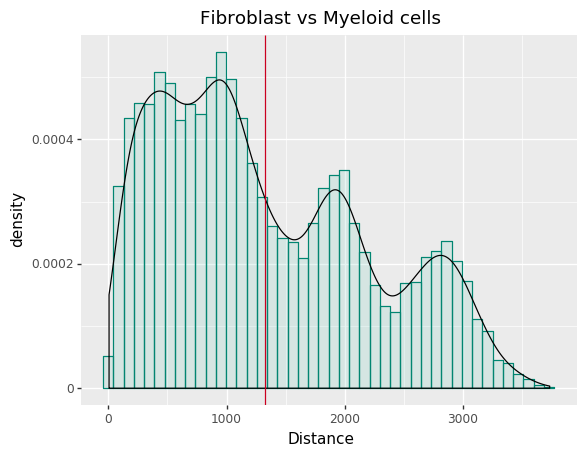

<ggplot: (360348871)>

In [57]:
f = final.loc[final['Sorted'] == 'FIBROBLAST_MYELOID'] 




avg_dist = f['Distance'].mean()



g = ggplot(f, aes(x='Distance')) + \
geom_histogram(aes(y='stat(density)'), color= '#018571', fill= '#80cdc1', alpha=.2) + \
geom_density() + \
geom_vline(f, aes(xintercept='avg_dist'), color = '#ca0020') + \
labs(title='Fibroblast vs Myeloid cells')
 



ggsave(filename='Distance_FibroblastvsMyeloid.png', plot = g, 
       path = '../Figures/')
g

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 151'. Pick better value with 'binwidth'.



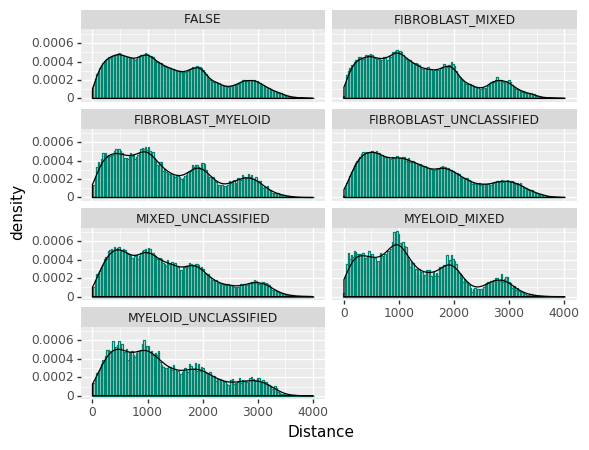

<ggplot: (362627446)>


In [75]:



# g = ggplot(final, aes(x='Distance')) + \
# geom_histogram(aes(y='stat(density)'), color= '#018571', fill= '#80cdc1', alpha=.2) + \
# geom_density() 
    
# print(g + facet_wrap('~ Sorted', nrow=4))

    
    
    
    
  

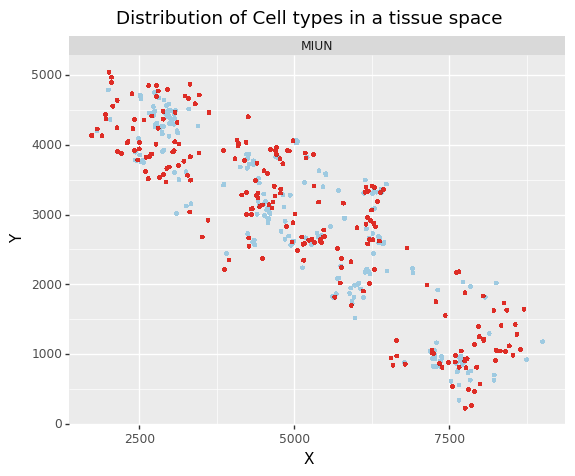

<ggplot: (350505855)>


In [58]:

p = gg.ggplot(f) + \
    gg.geom_point(gg.aes(x='X1', y='Y1'), size = 0.5, color = "#9ecae1") + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.geom_point(gg.aes(x='X2', y='Y2'), size = 0.5, color = "#de2d26")
   


    

#ggsave(filename='cell_classification.png', plot = p, 
       #path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')



In [58]:
distlist = [15, 25, 50, 100, 250, 500, 1000, 2000]

for i, p in enumerate(distlist):
    
    f2 = f.loc[final['Distance'] <= p]
    g = gg.ggplot(f2) + \
    gg.geom_point(gg.aes(x='X1', y='Y1'), size = 0.5, color = "#9ecae1") + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.labs(title= 'Distance_' +  str(p) + 'um') + \
    gg.geom_point(gg.aes(x='X2', y='Y2'), size = 0.5, color = "#de2d26") 
    ggsave(filename=str(p)+'.png', plot = g, 
       path = '../Figures/')
    
   


    







/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/15.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/25.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: ../Figures/50.png

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: Plotnin

In [ ]:
distlist = [15, 25, 50, 100, 250, 500, 1000, 2000]

for i, p in enumerate(distlist):
    
    f2 = f.loc[final['Distance'] <= p]
#     g = gg.ggplot(f2) + \
#     gg.geom_point(gg.aes(x='X1', y='Y1'), size = 0.5, color = "#9ecae1") + \
#     gg.xlab("X") + \
#     gg.ylab("Y") + \
#     gg.labs(title= 'Distance_' +  str(p) + 'um') + \
#     gg.geom_point(gg.aes(x='X2', y='Y2'), size = 0.5, color = "#de2d26") 
#     ggsave(filename=str(p)+'.png', plot = g, 
#        path = '/Users/habbasi/Desktop/')
    

In [19]:
# %reload_ext rpy2.ipython
# %R -i new

In [20]:
# from rpy2.robjects.packages import importr
# import rpy2.robjects as ro

# stats = importr('stats')
# base = importr('base')
# tidy = importr('tidyverse')
# akima = importr('akima')